In [0]:
import sys
in_colab = 'google.colab' in sys.modules
if in_colab:
    # Install packages in Colab
    !pip install category_encoders==2.0.0
    !pip install pandas-profiling==2.3.0
    !pip install plotly==4.1.1

In [0]:
#Fetch cannabis data file
from google.colab import files
uploaded = files.upload()

Saving cannabis.csv to cannabis (1).csv


In [119]:
# Load cannabis data
import pandas as pd
import io
df_cannabis = pd.read_csv(io.StringIO(uploaded['cannabis.csv'].decode('utf-8')))
df_cannabis.head(10)

,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."
5,3-Bears-Og,indica,0.0,None,None,3 Bears OG by Mephisto Genetics is an autoflow...
6,3-Kings,hybrid,4.4,"Relaxed,Euphoric,Happy,Uplifted,Hungry","Earthy,Sweet,Pungent","The 3 Kings marijuana strain, a holy trinity o..."
7,303-Og,indica,4.2,"Relaxed,Happy,Euphoric,Uplifted,Giggly","Citrus,Pungent,Earthy",The indica-dominant 303 OG is a Colorado strai...
8,3D-Cbd,sativa,4.6,"Uplifted,Focused,Happy,Talkative,Relaxed","Earthy,Woody,Flowery",3D CBD from Snoop Dogg’s branded line of canna...
9,3X-Crazy,indica,4.4,"Relaxed,Tingly,Happy,Euphoric,Uplifted","Earthy,Grape,Sweet","Also known as Optimus Prime, the indica-domina..."


In [186]:
# Split dataferame on Type
df_hybrid = pd.DataFrame(df_cannabis.loc[df_cannabis['Type']=='hybrid'])

df_hybrid.head()

,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."
6,3-Kings,hybrid,4.4,"Relaxed,Euphoric,Happy,Uplifted,Hungry","Earthy,Sweet,Pungent","The 3 Kings marijuana strain, a holy trinity o..."


In [0]:
# Function for sorting words alphabetically

def sortedSentence(Sentence): 
      
    # Spliting the Sentence into words 
    words = Sentence.split(" ") 
      
    # Sorting the words 
    words.sort() 
      
    # Making new Sentence by  
    # joining the sorted words 
    newSentence = " ".join(words) 
      
    # Return newSentence 
    return newSentence 

In [189]:
# Sort entries alphabetically in Effects (as order has no meaning)

# Replace commas with spaces 
df_hybrid = df_hybrid.stack().str.replace(',',' ').unstack()

df_hybrid['Effects'] = [sortedSentence(x) for x in df_hybrid['Effects']]

# Replace spaces with commas 
df_hybrid = df_hybrid.stack().str.replace(' ',',').unstack()
 
df_hybrid.head()

,Strain,Type,Effects,Flavor,Description
0,100-Og,hybrid,"Creative,Energetic,Euphoric,Relaxed,Tingly","Earthy,Sweet,Citrus","$100,OG,is,a,50/50,hybrid,strain,that,packs,a,..."
1,98-White-Widow,hybrid,"Aroused,Creative,Energetic,Happy,Relaxed","Flowery,Violet,Diesel","The,‘98,Aloha,White,Widow,is,an,especially,pot..."
3,13-Dawgs,hybrid,"Creative,Hungry,Relaxed,Tingly,Uplifted","Apricot,Citrus,Grapefruit","13,Dawgs,is,a,hybrid,of,G13,and,Chemdawg,genet..."
4,24K-Gold,hybrid,"Euphoric,Happy,Relaxed,Talkative,Uplifted","Citrus,Earthy,Orange","Also,known,as,Kosher,Tangie,,24k,Gold,is,a,60%..."
6,3-Kings,hybrid,"Euphoric,Happy,Hungry,Relaxed,Uplifted","Earthy,Sweet,Pungent","The,3,Kings,marijuana,strain,,a,holy,trinity,o..."


In [190]:
# Determine all Effects sets
df_hybrid['Effects'].value_counts()

Creative,Euphoric,Happy,Relaxed,Uplifted       96
Energetic,Euphoric,Happy,Relaxed,Uplifted      73
Euphoric,Happy,Relaxed,Sleepy,Uplifted         60
Euphoric,Focused,Happy,Relaxed,Uplifted        57
None                                           49
                                               ..
Creative,Euphoric,Hungry,Sleepy,Tingly          1
Creative,Energetic,Giggly,Happy,Hungry          1
Creative,Hungry,Relaxed,Talkative,Uplifted      1
Euphoric,Focused,Happy,Tingly,Uplifted          1
Creative,Energetic,Euphoric,Hungry,Uplifted     1
Name: Effects, Length: 326, dtype: int64

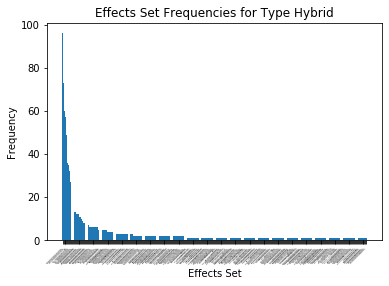

In [194]:
effects_set_distribution = df_hybrid['Effects'].value_counts()

x = list(effects_set_distribution.index)
y = list(effects_set_distribution)

fig, ax = plt.subplots()
ax.set_title('Effects Set Frequencies for Type Hybrid')
plt.bar(x,y,align='center')
plt.setp(ax.get_xticklabels(), ha="right", rotation=45)
plt.rc('xtick', labelsize=1)    # fontsize of the tick labels
plt.xlabel('Effects Set')
plt.ylabel('Frequency')

plt.show()

In [202]:
# Determine all individual Effects choices
df_hybrid['Effects'].str.split(',', expand=True).stack().value_counts()

Happy        967
Relaxed      896
Uplifted     848
Euphoric     843
Creative     429
Energetic    342
Focused      309
Sleepy       241
Hungry       228
Talkative    192
Giggly       168
Tingly       163
Aroused       87
None          49
Mouth          1
Dry            1
dtype: int64

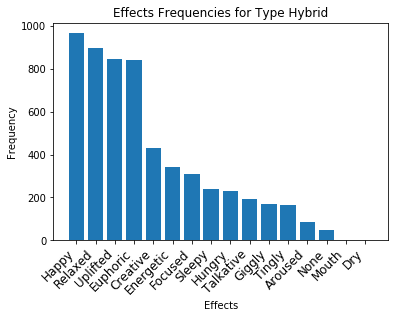

In [204]:
effects_distribution = df_hybrid['Effects'].str.split(',', expand=True).stack().value_counts()

x = list(effects_distribution.index)
y = list(effects_distribution)

fig, ax = plt.subplots()
ax.set_title('Effects Frequencies for Type Hybrid')
plt.bar(x,y,align='center')
plt.setp(ax.get_xticklabels(), ha="right", rotation=45)
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.xlabel('Effects')
plt.ylabel('Frequency')

plt.show()

In [174]:
df_indica = df_cannabis.loc[df_cannabis['Type']=='indica']

df_indica.head()

,Strain,Type,Rating,Effects,Flavor,Description
5,3-Bears-Og,indica,0.0,None,None,3 Bears OG by Mephisto Genetics is an autoflow...
7,303-Og,indica,4.2,"Relaxed,Happy,Euphoric,Uplifted,Giggly","Citrus,Pungent,Earthy",The indica-dominant 303 OG is a Colorado strai...
9,3X-Crazy,indica,4.4,"Relaxed,Tingly,Happy,Euphoric,Uplifted","Earthy,Grape,Sweet","Also known as Optimus Prime, the indica-domina..."
12,5Th-Element,indica,4.4,"Relaxed,Focused,Euphoric,Uplifted,Aroused","Earthy,Woody,Pine",Elemental Seeds crossed Blackberry with All Sp...
14,8-Ball-Kush,indica,4.3,"Relaxed,Uplifted,Happy,Creative,Euphoric","Citrus,Earthy,Pine","Bred by Barney’s Farm, 8 Ball Kush is a pure i..."


In [192]:
# Sort entries alphabetically in Effects (as order has no meaning)

# Replace commas with spaces 
df_indica = df_indica.stack().str.replace(',',' ').unstack()

df_indica['Effects'] = [sortedSentence(x) for x in df_indica['Effects']]

# Replace spaces with commas 
df_indica = df_indica.stack().str.replace(' ',',').unstack()
 
df_indica.head()

,Strain,Type,Effects,Flavor,Description
5,3-Bears-Og,indica,None,None,"3,Bears,OG,by,Mephisto,Genetics,is,an,autoflow..."
7,303-Og,indica,"Euphoric,Giggly,Happy,Relaxed,Uplifted","Citrus,Pungent,Earthy","The,indica-dominant,303,OG,is,a,Colorado,strai..."
9,3X-Crazy,indica,"Euphoric,Happy,Relaxed,Tingly,Uplifted","Earthy,Grape,Sweet","Also,known,as,Optimus,Prime,,the,indica-domina..."
12,5Th-Element,indica,"Aroused,Euphoric,Focused,Relaxed,Uplifted","Earthy,Woody,Pine","Elemental,Seeds,crossed,Blackberry,with,All,Sp..."
14,8-Ball-Kush,indica,"Creative,Euphoric,Happy,Relaxed,Uplifted","Citrus,Earthy,Pine","Bred,by,Barney’s,Farm,,8,Ball,Kush,is,a,pure,i..."


In [197]:
# Determine all Effects sets
df_indica['Effects'].value_counts()

Euphoric,Happy,Relaxed,Sleepy,Uplifted      94
Euphoric,Happy,Hungry,Relaxed,Sleepy        93
Euphoric,Happy,Relaxed,Sleepy,Tingly        40
None                                        19
Creative,Euphoric,Happy,Relaxed,Uplifted    19
                                            ..
Euphoric,Happy,Sleepy,Tingly,Uplifted        1
Aroused,Creative,Euphoric,Giggly,Happy       1
Aroused,Euphoric,Relaxed,Tingly,Uplifted     1
Creative,Euphoric,Hungry,Relaxed,Sleepy      1
Aroused,Focused,Hungry,Relaxed,Sleepy        1
Name: Effects, Length: 204, dtype: int64

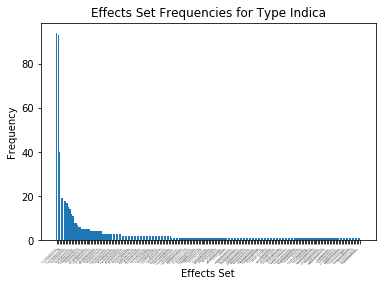

In [198]:
effects_set_distribution = df_indica['Effects'].value_counts()

x = list(effects_set_distribution.index)
y = list(effects_set_distribution)

fig, ax = plt.subplots()
ax.set_title('Effects Set Frequencies for Type Indica')
plt.bar(x,y,align='center')
plt.setp(ax.get_xticklabels(), ha="right", rotation=45)
plt.rc('xtick', labelsize=1)    # fontsize of the tick labels
plt.xlabel('Effects Set')
plt.ylabel('Frequency')

plt.show()

In [205]:
# Determine all individual Effects choices
df_indica['Effects'].str.split(',', expand=True).stack().value_counts()

Relaxed      628
Happy        562
Euphoric     516
Sleepy       468
Uplifted     331
Hungry       210
Tingly       143
Creative     128
Focused      106
Giggly        94
Aroused       69
Talkative     58
Energetic     36
None          19
dtype: int64

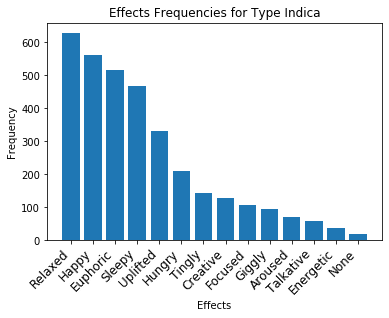

In [206]:
effects_distribution = df_indica['Effects'].str.split(',', expand=True).stack().value_counts()

x = list(effects_distribution.index)
y = list(effects_distribution)

fig, ax = plt.subplots()
ax.set_title('Effects Frequencies for Type Indica')
plt.bar(x,y,align='center')
plt.setp(ax.get_xticklabels(), ha="right", rotation=45)
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.xlabel('Effects')
plt.ylabel('Frequency')

plt.show()

In [175]:
df_sativa = df_cannabis.loc[df_cannabis['Type']=='sativa']

df_sativa.head()

,Strain,Type,Rating,Effects,Flavor,Description
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
8,3D-Cbd,sativa,4.6,"Uplifted,Focused,Happy,Talkative,Relaxed","Earthy,Woody,Flowery",3D CBD from Snoop Dogg’s branded line of canna...
27,Acapulco-Gold,sativa,4.5,"Happy,Uplifted,Euphoric,Energetic,Relaxed","Earthy,Sweet,Pungent","One of the most well-known strains, Acapulco G..."
30,Aceh,sativa,4.4,"Creative,Euphoric,Talkative,Energetic,Happy","Earthy,Mango,Lemon","Aceh, also called Atjeh, refers to the sativa ..."
32,Acid-Dough,sativa,5.0,"Talkative,Giggly,Happy,Hungry,Relaxed",None,Acid Dough by Ripper Seeds is a sativa-dominan...


In [196]:
# Sort entries alphabetically in Effects (as order has no meaning)

# Replace commas with spaces 
df_sativa = df_sativa.stack().str.replace(',',' ').unstack()

df_sativa['Effects'] = [sortedSentence(x) for x in df_sativa['Effects']]

# Replace spaces with commas 
df_sativa = df_sativa.stack().str.replace(' ',',').unstack()
 
df_sativa.head()

,Strain,Type,Effects,Flavor,Description
2,1024,sativa,"Creative,Energetic,Happy,Relaxed,Uplifted","Spicy/Herbal,Sage,Woody","1024,is,a,sativa-dominant,hybrid,bred,in,Spain..."
8,3D-Cbd,sativa,"Focused,Happy,Relaxed,Talkative,Uplifted","Earthy,Woody,Flowery","3D,CBD,from,Snoop,Dogg’s,branded,line,of,canna..."
27,Acapulco-Gold,sativa,"Energetic,Euphoric,Happy,Relaxed,Uplifted","Earthy,Sweet,Pungent","One,of,the,most,well-known,strains,,Acapulco,G..."
30,Aceh,sativa,"Creative,Energetic,Euphoric,Happy,Talkative","Earthy,Mango,Lemon","Aceh,,also,called,Atjeh,,refers,to,the,sativa,..."
32,Acid-Dough,sativa,"Giggly,Happy,Hungry,Relaxed,Talkative",None,"Acid,Dough,by,Ripper,Seeds,is,a,sativa-dominan..."


In [200]:
# Determine all Effects sets
df_sativa['Effects'].value_counts()

Energetic,Euphoric,Happy,Relaxed,Uplifted        28
Creative,Energetic,Euphoric,Happy,Uplifted       26
Energetic,Euphoric,Focused,Happy,Uplifted        24
None                                             19
Creative,Energetic,Focused,Happy,Uplifted        16
                                                 ..
Aroused,Creative,Energetic,Euphoric,Talkative     1
Creative,Euphoric,Happy,Relaxed,Talkative         1
Aroused,Creative,Focused,Happy,Relaxed            1
Energetic,Giggly,Happy,Tingly,Uplifted            1
Energetic,Focused,Hungry,Talkative,Uplifted       1
Name: Effects, Length: 159, dtype: int64

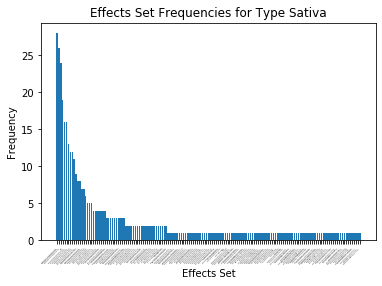

In [201]:
effects_set_distribution = df_sativa['Effects'].value_counts()

x = list(effects_set_distribution.index)
y = list(effects_set_distribution)

fig, ax = plt.subplots()
ax.set_title('Effects Set Frequencies for Type Sativa')
plt.bar(x,y,align='center')
plt.setp(ax.get_xticklabels(), ha="right", rotation=45)
plt.rc('xtick', labelsize=1)    # fontsize of the tick labels
plt.xlabel('Effects Set')
plt.ylabel('Frequency')

plt.show()

In [208]:
# Determine all individual Effects choices
df_sativa['Effects'].str.split(',', expand=True).stack().value_counts()

Happy        342
Uplifted     328
Euphoric     276
Energetic    268
Relaxed      202
Creative     190
Focused      180
Talkative    110
Aroused       43
Hungry        41
Tingly        40
Giggly        36
Sleepy        29
None          19
dtype: int64

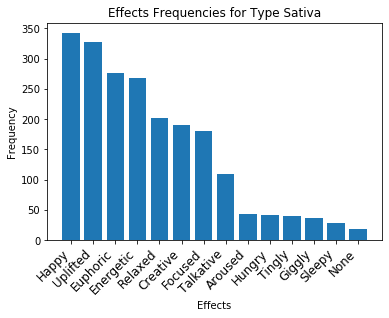

In [209]:
effects_distribution = df_sativa['Effects'].str.split(',', expand=True).stack().value_counts()

x = list(effects_distribution.index)
y = list(effects_distribution)

fig, ax = plt.subplots()
ax.set_title('Effects Frequencies for Type Sativa')
plt.bar(x,y,align='center')
plt.setp(ax.get_xticklabels(), ha="right", rotation=45)
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.xlabel('Effects')
plt.ylabel('Frequency')

plt.show()

In [120]:
# We assess the contents of df_cannabis
df_cannabis_shape = df_cannabis.shape
print ('df_cannabis Shape')
print (df_cannabis_shape, '\n')
print ('df_cannabis Count')
print (df_cannabis.count(), '\n')
print ('df_cannabis NaN Count')
print (df_cannabis.isna().sum(), '\n')
print ('df_cannabis Describe')
print (df_cannabis.describe())

df_cannabis Shape
(2351, 6) 

df_cannabis Count
Strain         2351
Type           2351
Rating         2351
Effects        2351
Flavor         2305
Description    2318
dtype: int64 

df_cannabis NaN Count
Strain          0
Type            0
Rating          0
Effects         0
Flavor         46
Description    33
dtype: int64 

df_cannabis Describe
            Rating
count  2351.000000
mean      4.310634
std       0.836394
min       0.000000
25%       4.200000
50%       4.400000
75%       4.700000
max       5.000000


In [121]:
# In Type column Make hybrid = 2, indica = 1, and sativa = 0

mapping = {
  'hybrid': 2,
  'indica': 1,
  'sativa': 0
}

df_cannabis1 = df_cannabis.replace({'Type': mapping})

df_cannabis1.head(7)

,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,2,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,2,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,0,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,2,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,2,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."
5,3-Bears-Og,1,0.0,None,None,3 Bears OG by Mephisto Genetics is an autoflow...
6,3-Kings,2,4.4,"Relaxed,Euphoric,Happy,Uplifted,Hungry","Earthy,Sweet,Pungent","The 3 Kings marijuana strain, a holy trinity o..."


In [122]:
# Drop NaN values for Flavor
df_cannabis2 = df_cannabis1.dropna(subset = ['Flavor'])

print ('df_cannabis2 NaN Count')
print (df_cannabis2.isna().sum(), '\n')

df_cannabis2 NaN Count
Strain          0
Type            0
Rating          0
Effects         0
Flavor          0
Description    28
dtype: int64 



In [123]:
# Compare Number of unique strains to the number of rows
df_cannabis2['Strain'].nunique(dropna = True)

2304

In [124]:
# Since there are 2351 rows but only 2304 strains, 47 strains must belong to more than one row
# Aggregate rows corresponding to the same strain
df_cannabis3 = df_cannabis2.astype(str).groupby('Strain').agg(','.join).reset_index()

df_cannabis3_shape = df_cannabis3.shape
print ('df_cannabis3 Shape')
print (df_cannabis3_shape, '\n')

print ('df_cannabis3 Count')
print (df_cannabis3.count(), '\n')

df_cannabis3.head()

df_cannabis3 Shape
(2304, 6) 

df_cannabis3 Count
Strain         2304
Type           2304
Rating         2304
Effects        2304
Flavor         2304
Description    2304
dtype: int64 



,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,2,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,1024,0,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
2,13-Dawgs,2,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
3,24K-Gold,2,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."
4,3-Bears-Og,1,0.0,None,None,3 Bears OG by Mephisto Genetics is an autoflow...


In [125]:
# Identify entries in Type and Rating where aggregation left double values
df_cannabis3['Type'].value_counts()

2      1185
1       687
0       431
2,2       1
Name: Type, dtype: int64

In [126]:
df_cannabis3['Rating'].value_counts()

4.5        314
4.3        295
4.4        284
4.6        241
4.2        223
5.0        197
4.7        162
4.8        156
4.1         98
4.0         96
0.0         66
4.9         59
3.9         28
3.8         21
3.7         15
3.0         13
3.6         11
3.5          8
3.4          5
3.2          3
3.3          3
2.0          2
5.0,5.0      1
3.1          1
1.0          1
2.8          1
Name: Rating, dtype: int64

In [127]:
# Resolve double entries in Type and Rating due to aggregation
df_cannabis3.Type[df_cannabis3.Type == '2,2'] = 2
df_cannabis3['Type'].value_counts()

2    1185
1     687
0     431
2       1
Name: Type, dtype: int64

In [128]:
import numpy as np
type_distribution = df_cannabis3['Type'].value_counts()

type_distribution.iloc[0] = type_distribution.iloc[3] + type_distribution.iloc[0]
type_distribution = type_distribution.drop(type_distribution.index[3])
print(type_distribution)

2    1186
1     687
0     431
Name: Type, dtype: int64


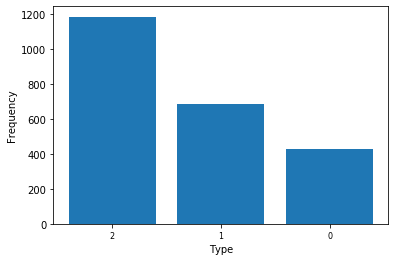

In [129]:
x = list(type_distribution.index)
y = list(type_distribution)

plt.bar(x,y,align='center')
plt.xlabel('Type')
plt.ylabel('Frequency')

plt.show()

In [130]:
df_cannabis3.Rating[df_cannabis3.Rating == '5.0,5.0'] = 5.0
df_cannabis3['Rating'].value_counts()

4.5    314
4.3    295
4.4    284
4.6    241
4.2    223
5.0    197
4.7    162
4.8    156
4.1     98
4.0     96
0.0     66
4.9     59
3.9     28
3.8     21
3.7     15
3.0     13
3.6     11
3.5      8
3.4      5
3.3      3
3.2      3
2.0      2
1.0      1
3.1      1
2.8      1
5.0      1
Name: Rating, dtype: int64

In [131]:
rating_distribution = df_cannabis3['Rating'].value_counts()

rating_distribution.iloc[5] = rating_distribution.iloc[5] + rating_distribution.iloc[25]
rating_distribution = rating_distribution.drop(rating_distribution.index[25])
print(rating_distribution)

4.5    314
4.3    295
4.4    284
4.6    241
4.2    223
5.0    198
4.7    162
4.8    156
4.1     98
4.0     96
0.0     66
4.9     59
3.9     28
3.8     21
3.7     15
3.0     13
3.6     11
3.5      8
3.4      5
3.3      3
3.2      3
2.0      2
1.0      1
3.1      1
2.8      1
Name: Rating, dtype: int64


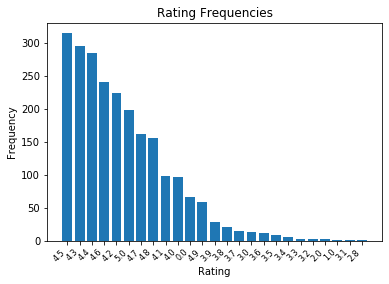

In [132]:
x = list(rating_distribution.index)
y = list(rating_distribution)

fig, ax = plt.subplots()
ax.set_title('Rating Frequencies')
plt.bar(x,y,align='center')
plt.setp(ax.get_xticklabels(), ha="right", rotation=45)
plt.rc('xtick', labelsize=8)    # fontsize of the tick labels
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.show()

In [133]:
# Drop rows where Effects are None or Flavor is None
df_cannabis4 = df_cannabis3[df_cannabis3.astype(str).ne('None').all(1)]

df_cannabis4_shape = df_cannabis4.shape
print ('df_cannabis4 Shape')
print (df_cannabis4_shape, '\n')

print ('df_cannabis4 Count')
print (df_cannabis4.count(), '\n')

df_cannabis4.head()

df_cannabis4 Shape
(2190, 6) 

df_cannabis4 Count
Strain         2190
Type           2190
Rating         2190
Effects        2190
Flavor         2190
Description    2190
dtype: int64 



,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,2,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,1024,0,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
2,13-Dawgs,2,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
3,24K-Gold,2,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."
5,3-Kings,2,4.4,"Relaxed,Euphoric,Happy,Uplifted,Hungry","Earthy,Sweet,Pungent","The 3 Kings marijuana strain, a holy trinity o..."


In [134]:
# Drop Description column
df_cannabis5 = df_cannabis4.drop(['Description'], axis=1)

df_cannabis5.head()

,Strain,Type,Rating,Effects,Flavor
0,100-Og,2,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus"
1,1024,0,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody"
2,13-Dawgs,2,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit"
3,24K-Gold,2,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange"
5,3-Kings,2,4.4,"Relaxed,Euphoric,Happy,Uplifted,Hungry","Earthy,Sweet,Pungent"


In [0]:
# Function for sorting words alphabetically

def sortedSentence(Sentence): 
      
    # Spliting the Sentence into words 
    words = Sentence.split(" ") 
      
    # Sorting the words 
    words.sort() 
      
    # Making new Sentence by  
    # joining the sorted words 
    newSentence = " ".join(words) 
      
    # Return newSentence 
    return newSentence 

In [136]:
# Sort entries alphabetically in Effects (as order has no meaning)

# Replace commas with spaces 
df_cannabis5 = df_cannabis5.stack().str.replace(',',' ').unstack()

df_cannabis5['Effects'] = [sortedSentence(x) for x in df_cannabis5['Effects']]

# Replace spaces with commas 
df_cannabis5 = df_cannabis5.stack().str.replace(' ',',').unstack()
 
df_cannabis5.head()

,Strain,Type,Rating,Effects,Flavor
0,100-Og,2,4.0,"Creative,Energetic,Euphoric,Relaxed,Tingly","Earthy,Sweet,Citrus"
1,1024,0,4.4,"Creative,Energetic,Happy,Relaxed,Uplifted","Spicy/Herbal,Sage,Woody"
2,13-Dawgs,2,4.2,"Creative,Hungry,Relaxed,Tingly,Uplifted","Apricot,Citrus,Grapefruit"
3,24K-Gold,2,4.6,"Euphoric,Happy,Relaxed,Talkative,Uplifted","Citrus,Earthy,Orange"
5,3-Kings,2,4.4,"Euphoric,Happy,Hungry,Relaxed,Uplifted","Earthy,Sweet,Pungent"


In [137]:
# Sort entries alphabetically in Flavor (as order has no meaning)

# Replace commas with spaces 
df_cannabis5 = df_cannabis5.stack().str.replace(',',' ').unstack()

df_cannabis5['Flavor'] = [sortedSentence(x) for x in df_cannabis5['Flavor']]

# Replace spaces with commas 
df_cannabis5 = df_cannabis5.stack().str.replace(' ',',').unstack()
 
df_cannabis5.head()

,Strain,Type,Rating,Effects,Flavor
0,100-Og,2,4.0,"Creative,Energetic,Euphoric,Relaxed,Tingly","Citrus,Earthy,Sweet"
1,1024,0,4.4,"Creative,Energetic,Happy,Relaxed,Uplifted","Sage,Spicy/Herbal,Woody"
2,13-Dawgs,2,4.2,"Creative,Hungry,Relaxed,Tingly,Uplifted","Apricot,Citrus,Grapefruit"
3,24K-Gold,2,4.6,"Euphoric,Happy,Relaxed,Talkative,Uplifted","Citrus,Earthy,Orange"
5,3-Kings,2,4.4,"Euphoric,Happy,Hungry,Relaxed,Uplifted","Earthy,Pungent,Sweet"


In [138]:
# Embarking upon a process akin to tokenization for Effects and Flavor features
# Determine all of the Flavor choice sets
df_cannabis5['Flavor'].value_counts()

Earthy,Pungent,Sweet           78
Citrus,Earthy,Sweet            52
Berry,Earthy,Sweet             51
Earthy,Sweet,Woody             42
Berry,Blueberry,Sweet          40
                               ..
Ammonia,Earthy,Pepper           1
Flowery,Pepper,Spicy/Herbal     1
Berry,Lemon,Orange              1
Apple                           1
Pine,Skunk,Woody                1
Name: Flavor, Length: 800, dtype: int64

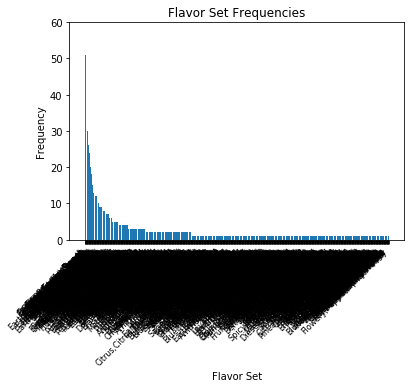

In [139]:
flavor_set_distribution = df_cannabis5['Flavor'].value_counts()

x = list(flavor_set_distribution.index)
y = list(flavor_set_distribution)

fig, ax = plt.subplots()
ax.set_title('Flavor Set Frequencies')
plt.bar(x,y,align='center')
plt.setp(ax.get_xticklabels(), ha="right", rotation=45)
plt.rc('xtick', labelsize=0)    # fontsize of the tick labels
ax.set_ylim([0,60])
plt.xlabel('Flavor Set')
plt.ylabel('Frequency')

plt.show()

In [140]:
# Determine all of the individual Flavor choices
df_cannabis5['Flavor'].str.split(',', expand=True).stack().value_counts()

Earthy          1105
Sweet           1052
Citrus           526
Pungent          451
Berry            355
Pine             300
Flowery          266
Woody            255
Diesel           240
Spicy/Herbal     225
Lemon            189
Skunk            174
Tropical         153
Blueberry        145
Grape            126
Orange            77
Cheese            68
Pepper            58
Lime              53
Strawberry        47
Pineapple         42
Minty             41
Sage              39
Grapefruit        38
Lavender          37
Chemical          37
Tree              34
Fruit             34
Vanilla           34
Mango             32
Honey             31
Ammonia           28
Nutty             25
Coffee            24
Menthol           23
Butter            19
Mint              18
Tea               17
Apple             16
Rose              16
Tobacco            9
Blue               9
Apricot            9
Tar                8
Violet             7
Chestnut           7
Peach              5
Pear         

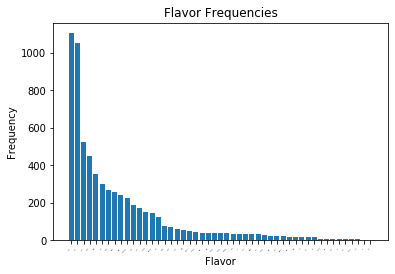

In [141]:
flavor_distribution = df_cannabis5['Flavor'].str.split(',', expand=True).stack().value_counts()

x = list(flavor_distribution.index)
y = list(flavor_distribution)

fig, ax = plt.subplots()
ax.set_title('Flavor Frequencies')
plt.bar(x,y,align='center')
plt.setp(ax.get_xticklabels(), ha="right", rotation=45)
plt.rc('xtick', labelsize=4)    # fontsize of the tick labels
plt.xlabel('Flavor')
plt.ylabel('Frequency')

plt.show()

In [142]:
# Get list of flavor choice sets
flavor_set_list = list(df_cannabis5['Flavor'].unique())
print(flavor_set_list)

['Citrus,Earthy,Sweet', 'Sage,Spicy/Herbal,Woody', 'Apricot,Citrus,Grapefruit', 'Citrus,Earthy,Orange', 'Earthy,Pungent,Sweet', 'Citrus,Earthy,Pungent', 'Earthy,Flowery,Woody', 'Diesel,Pine', 'Earthy,Grape,Sweet', 'Earthy,Pine,Skunk', 'Earthy,Pine,Woody', 'Earthy,Pungent,Woody', 'Citrus,Earthy,Pine', 'Diesel,Earthy,Flowery', 'Berry,Earthy,Sweet', 'Berry,Earthy,Pungent', 'Diesel,Flowery,Violet', 'Citrus,Pungent,Sweet', 'Diesel,Earthy,Pepper', 'Citrus,Earthy,Woody', 'Blue,Cheese,Chemical,Menthol', 'Diesel,Earthy,Pine', 'Diesel,Earthy,Spicy/Herbal', 'Earthy,Sweet,Woody', 'Earthy,Lemon,Mango', 'Diesel,Earthy,Lemon', 'Earthy,Flowery,Sweet', 'Citrus,Lemon,Sweet', 'Lemon,Peach,Pungent', 'Sweet,Vanilla', 'Chemical,Diesel,Earthy', 'Chestnut,Earthy,Nutty', 'Earthy,Flowery,Tea', 'Skunk,Sweet,Woody', 'Diesel,Earthy,Pungent', 'Diesel,Flowery,Sweet', 'Earthy,Pine,Sweet', 'Chemical,Flowery,Spicy/Herbal', 'Flowery,Skunk,Sweet', 'Citrus,Skunk', 'Pine,Sweet,Woody', 'Pine,Pungent,Woody', 'Earthy,Tobacco'

In [143]:
# Get list of individual flavor choices
flavor_list = list(df_cannabis5['Flavor'].str.split(',', expand=True).stack().unique())
print(flavor_list)

['Citrus', 'Earthy', 'Sweet', 'Sage', 'Spicy/Herbal', 'Woody', 'Apricot', 'Grapefruit', 'Orange', 'Pungent', 'Flowery', 'Diesel', 'Pine', 'Grape', 'Skunk', 'Berry', 'Violet', 'Pepper', 'Blue', 'Cheese', 'Chemical', 'Menthol', 'Lemon', 'Mango', 'Peach', 'Vanilla', 'Chestnut', 'Nutty', 'Tea', 'Tobacco', 'Tropical', 'Strawberry', 'Blueberry', 'Mint', 'Apple', 'Honey', 'Lavender', 'Lime', 'Coffee', 'Ammonia', 'Minty', 'Fruit', 'Tree', 'Butter', 'Pineapple', 'Tar', 'Rose', 'Plum', 'Pear']


In [144]:
# Determine all Effects sets
df_cannabis5['Effects'].value_counts()

Euphoric,Happy,Relaxed,Sleepy,Uplifted         156
Creative,Euphoric,Happy,Relaxed,Uplifted       128
Euphoric,Happy,Hungry,Relaxed,Sleepy           118
Energetic,Euphoric,Happy,Relaxed,Uplifted      101
Euphoric,Focused,Happy,Relaxed,Uplifted         81
                                              ... 
Creative,Relaxed,Talkative,Tingly,Uplifted       1
Aroused,Energetic,Euphoric,Hungry,Tingly         1
Creative,Euphoric,Giggly,Relaxed,Sleepy          1
Creative,Energetic,Euphoric,Hungry,Uplifted      1
Energetic,Focused,Hungry,Talkative,Uplifted      1
Name: Effects, Length: 458, dtype: int64

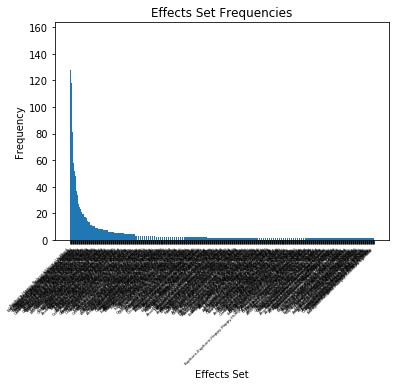

In [145]:
effects_set_distribution = df_cannabis5['Effects'].value_counts()

x = list(effects_set_distribution.index)
y = list(effects_set_distribution)

fig, ax = plt.subplots()
ax.set_title('Effects Set Frequencies')
plt.bar(x,y,align='center')
plt.setp(ax.get_xticklabels(), ha="right", rotation=45)
plt.rc('xtick', labelsize=1)    # fontsize of the tick labels
plt.xlabel('Effects Set')
plt.ylabel('Frequency')

plt.show()

In [146]:
# Determine all individual Effects choices
df_cannabis5['Effects'].str.split(',', expand=True).stack().value_counts()

Happy        1831
Relaxed      1692
Euphoric     1594
Uplifted     1470
Creative      723
Sleepy        718
Energetic     621
Focused       579
Hungry        457
Talkative     348
Tingly        331
Giggly        286
Aroused       193
Mouth           1
Dry             1
dtype: int64

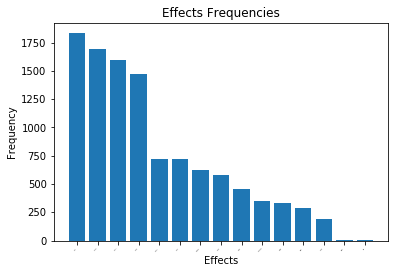

In [147]:
effects_distribution = df_cannabis5['Effects'].str.split(',', expand=True).stack().value_counts()

x = list(effects_distribution.index)
y = list(effects_distribution)

fig, ax = plt.subplots()
ax.set_title('Effects Frequencies')
plt.bar(x,y,align='center')
plt.setp(ax.get_xticklabels(), ha="right", rotation=45)
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.xlabel('Effects')
plt.ylabel('Frequency')

plt.show()